# 3.3 Konfidenzbänder

In [1]:
source("util.R")

## Hilfsfunktionen

In [2]:
default_theme <- function() {
  theme_jupyter() + theme_squared()
}

add_qq_band <- function(gg, 
                        dname, dparams, 
                        band_type="ell", 
                        conf=0.95, 
                        band_alpha = 0.9) {
  gg + stat_qq_band(distribution=dname, 
                    dparams = dparams,
                    bandType = band_type,
                    conf=conf, 
                    mapping = aes(fill = as.character(conf)), alpha = band_alpha)
}

create_ggplot <- function(title, data, dname, dparams = list(), 
                          band_type="ell", 
                          conf_levels = c(0.95),
                          band_alpha = 0.9,
                          show_scale = FALSE,
                          show_labs = FALSE,
                          theme = default_theme()) {
  gg <- ggplot(data = data, mapping = aes(sample = samples)) + theme
  for (conf in conf_levels) {
    gg <- add_qq_band(gg, dname, dparams, band_type = band_type, conf=conf, band_alpha = band_alpha)
  }  
  gg <- gg + stat_qq_line(distribution=dname, dparams = dparams) 
  gg <- gg + stat_qq_point(distribution=dname, dparams = dparams)
  if ( show_scale ) {
    gg <- gg + scale_fill_discrete("Konfidenzniveau")
  }
  else {
    gg <- gg + theme(legend.position = "none")
  }
  if ( show_labs) {
    gg <- gg + labs(x = "Theoretische Quantile", y = "Stichprobenquantile") 
  }
  else {
    gg <- gg + labs(x = NULL, y = NULL)
  }
  if ( ! is.null(title)) {
    gg <- gg + ggtitle(title)
  }
  gg
}

create_ggplot_from_sample_func <- function(title, 
                                           sample_func, 
                                           ref_func_name, ref_func_params = list(), 
                                           band_type="ell", 
                                           conf_levels = c(0.95),
                                           band_alpha = 0.9,
                                           show_scale = FALSE,
                                           theme = default_scheme()) {
  sample <- data.frame(samples = sample_func(100))
  create_ggplot(title, 
                sample, 
                ref_func_name, ref_func_params, 
                band_type = band_type, 
                conf_levels = conf_levels,
                band_alpha = band_alpha,
                show_scale = show_scale,
                theme = theme)
}

create_ggplots_from_sample_func <- function(title, 
                                            sample_func, 
                                            ref_func_name, ref_func_params = list(), 
                                            band_type="ell", 
                                            conf_levels = c(0.95),
                                            band_alpha = 0.9,
                                            theme = default_theme(),
                                            count = 1) {
  for ( i in 1:count) {
    single_sample_plot <- create_ggplot_from_sample_func(title, 
                                                         sample_func, 
                                                         ref_func_name, ref_func_params,
                                                         band_type = band_type, 
                                                         conf_levels = conf_levels,
                                                         band_alpha = band_alpha,
                                                         show_scale = length(conf_levels) > 1,
                                                         theme = theme)
    if ( i == 1) {
      multi_sample_plot <- single_sample_plot
    }
    else {
      multi_sample_plot <- multi_sample_plot + single_sample_plot
    }
  }
  multi_sample_plot
}

## ELL Konfidenzbänder Standardnormalverteilung

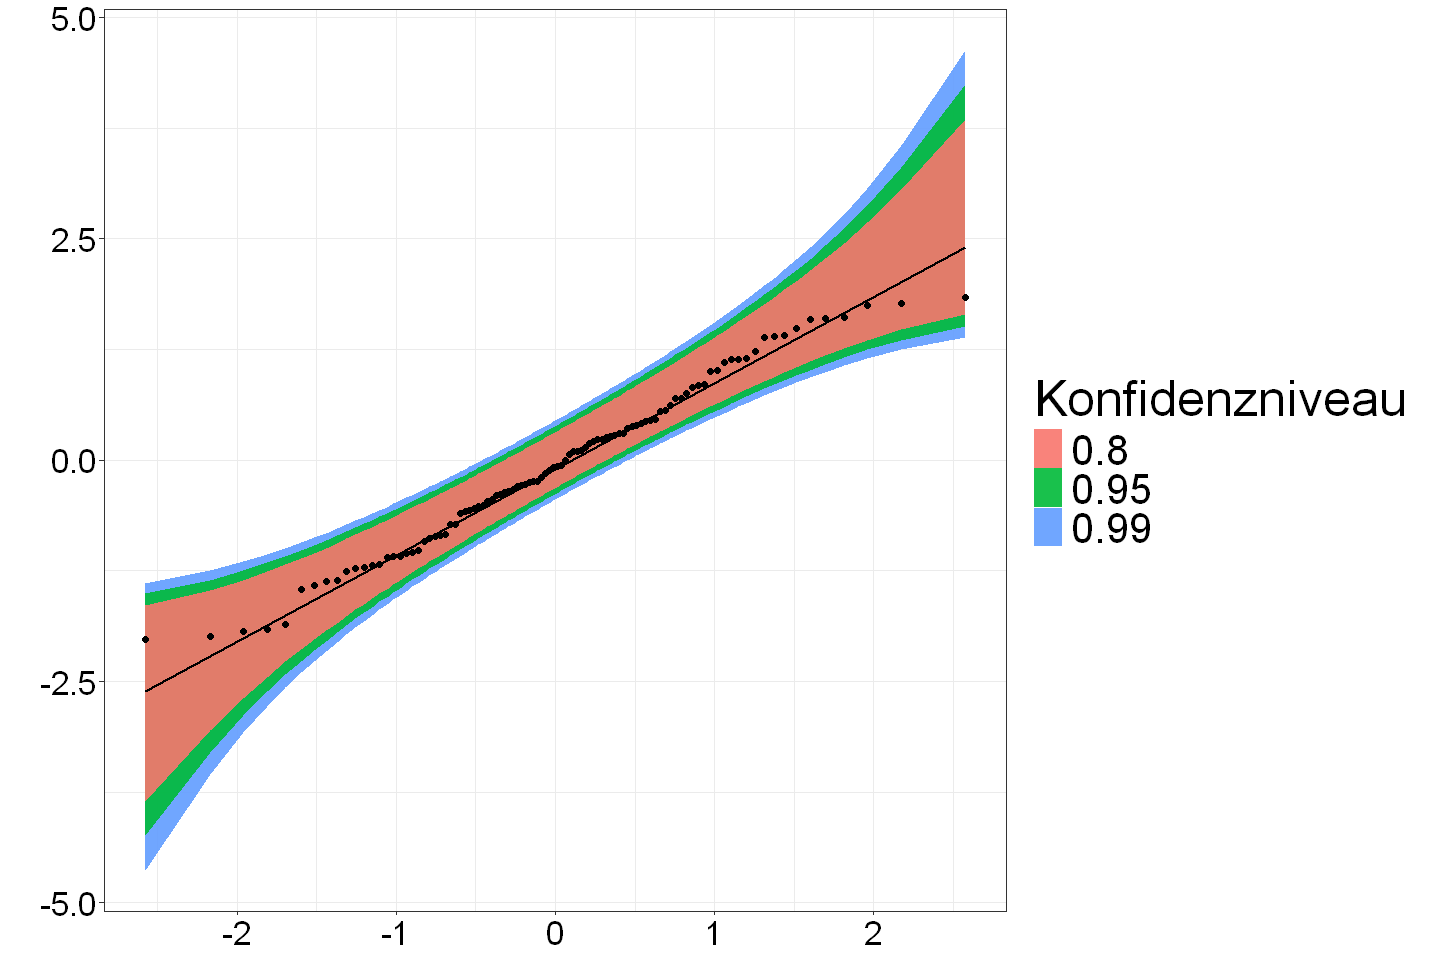

In [3]:
options(repr.plot.width=12, repr.plot.height=8)

set.seed(13)
norm_conf_band <- 
  create_ggplots_from_sample_func(NULL, 
                                  rnorm,
                                  "norm", list(mean = 0, sd = 1),
                                  conf_levels = c(0.99, 0.95, 0.8), 
                                  band_alpha=0.9) +
  default_theme()

print(norm_conf_band)

## ELL Konfidenzbänder $\chi^2$-Verteilung (df = 7)

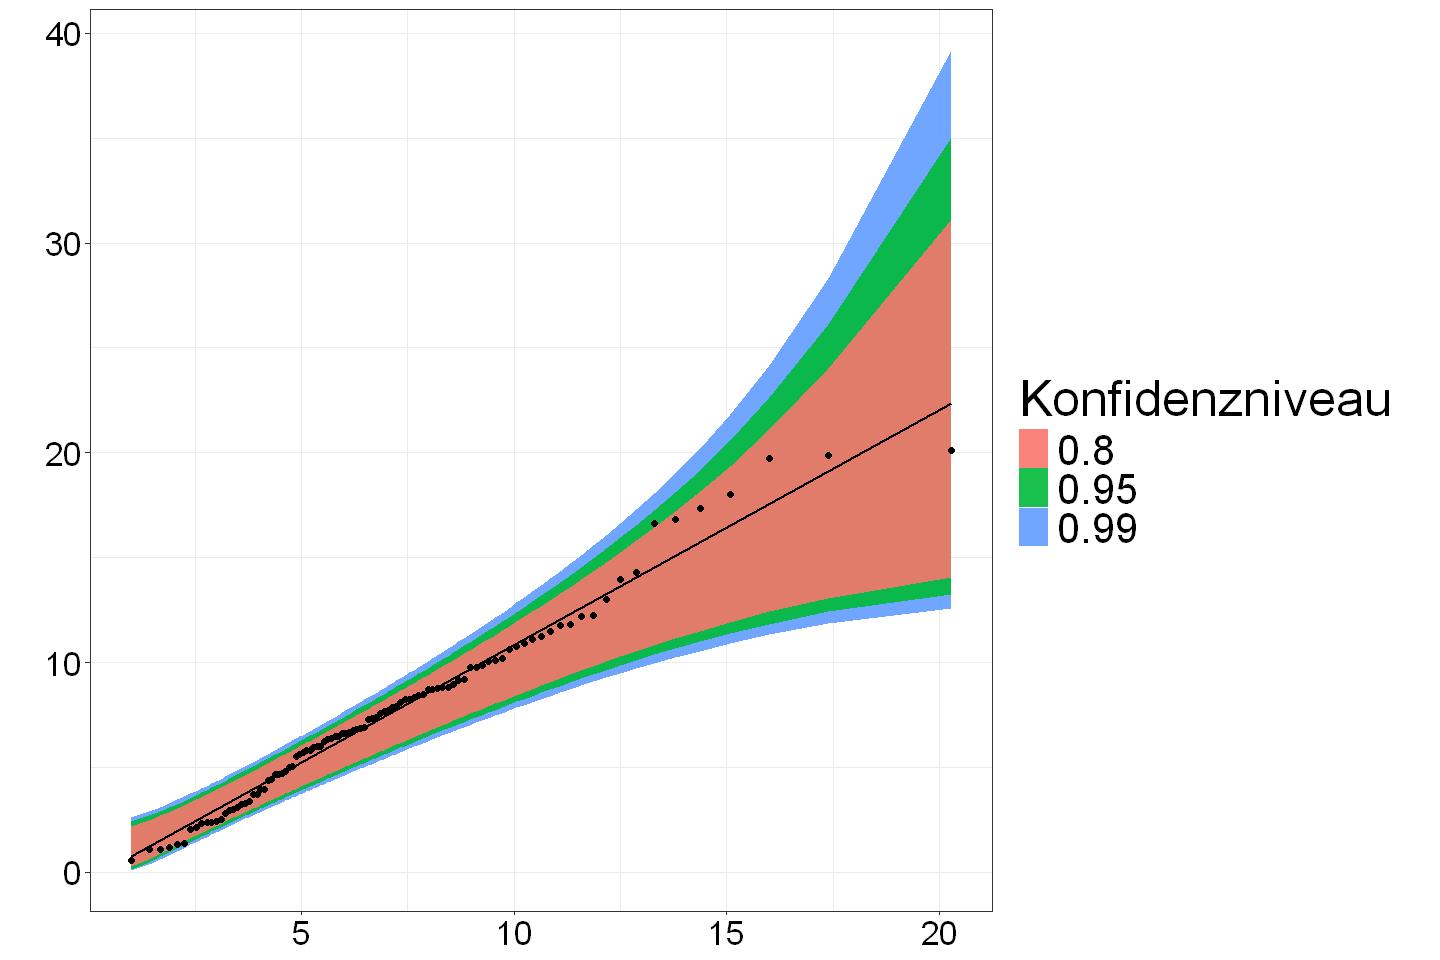

In [4]:
chi_square_ref_plot <- 
  create_ggplots_from_sample_func(NULL, 
                                  partial_func(rchisq, df = 7),
                                  "chisq", list(df = 7),
                                  conf_levels = c(0.99, 0.95, 0.8), 
                                  band_alpha=0.9)

print(chi_square_ref_plot)

## Q-Q Plots Stichproben t-Verteilungen

In [5]:
options(repr.plot.width=15, repr.plot.height=10)

t_distribution_plot <- function(df) {
  set.seed(13)
  gg <- create_ggplots_from_sample_func(NULL, 
                                        partial_func(rt, df = df),
                                        "norm", list(mean = 0, sd = 1),
                                        band_alpha=0.5,
                                        count = 6)
  gg + 
    plot_annotation(title = sprintf("QQ-Plot Stichprobe t-Verteilung (df=%d) vs. Normalverteilung",df),
                    theme = theme(plot.title = element_text(size=20, color = "black", hjust = 0.5)))
}

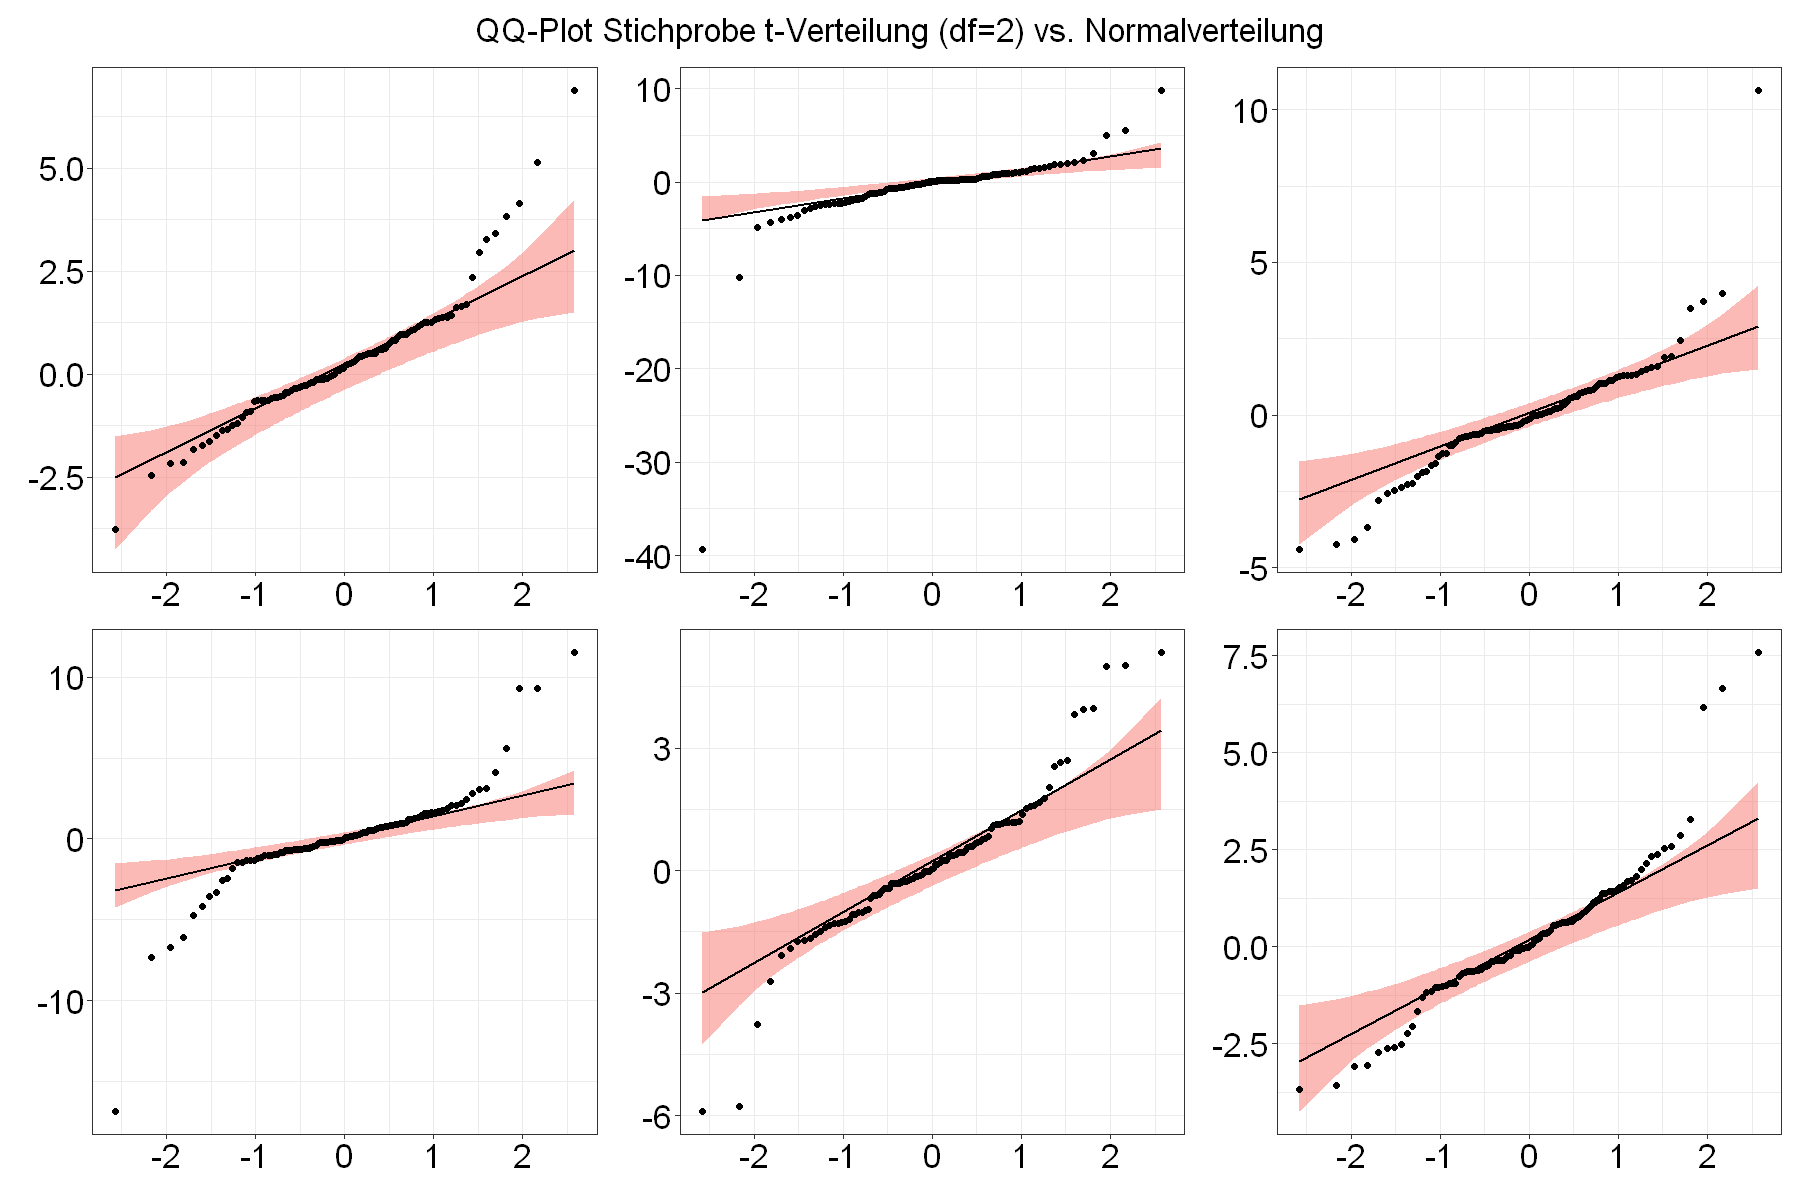

In [6]:
print(t_distribution_plot(2))

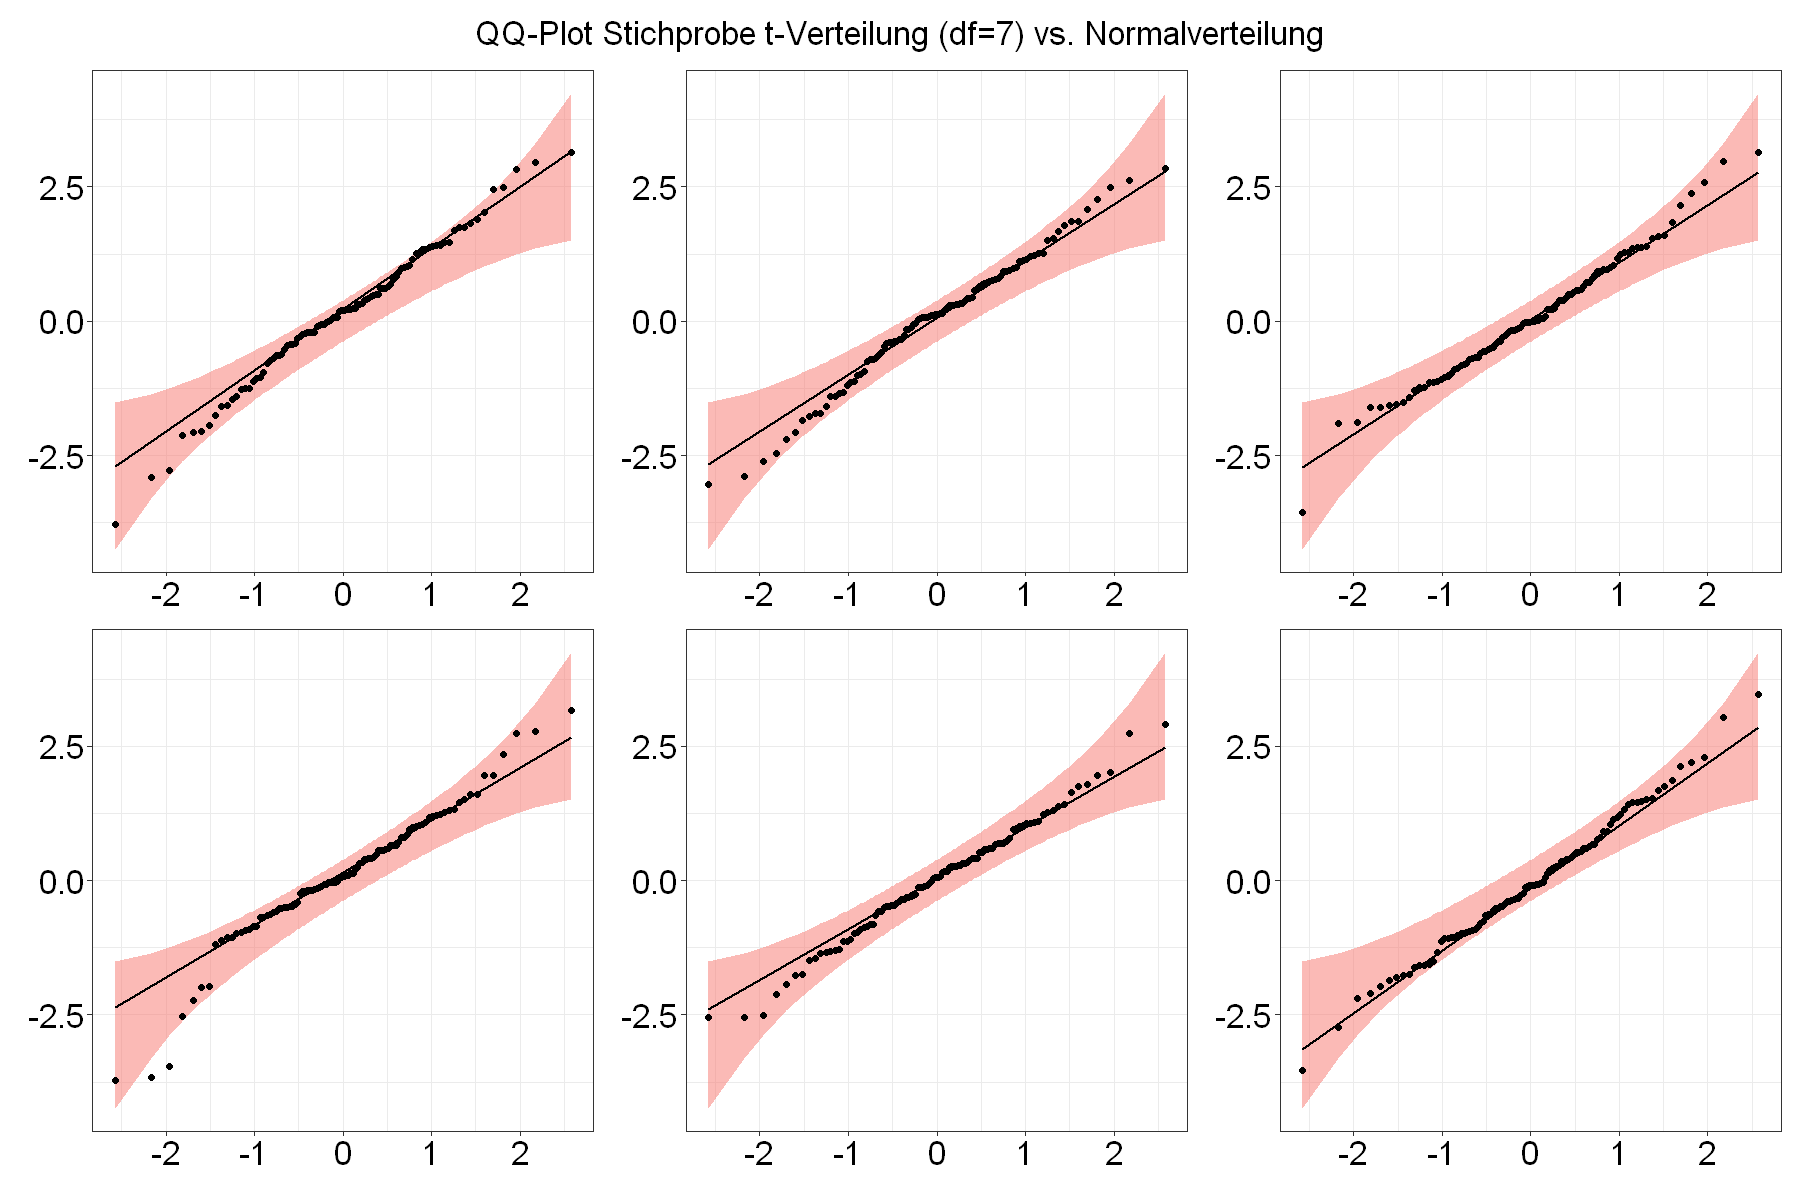

In [7]:
print(t_distribution_plot(7))